In [63]:
# Source: search for Black Friday Sales Prediction on Analytics Vidhya

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# reading the train and test datasets into traindt and testdt variables
traindt=pd.read_csv('/content/drive/MyDrive/Black Friday/Black_Friday_train.csv')
testdt=pd.read_csv('/content/drive/MyDrive/Black Friday/Black_Friday_test.csv')

In [65]:
traindt.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [67]:
testdt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [68]:
print(traindt.shape)
print(testdt.shape)

(550068, 12)
(233599, 11)


In [69]:
traindt.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [70]:
graphcols=['Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']

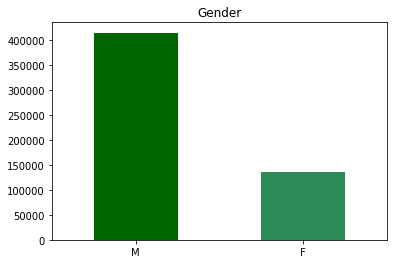

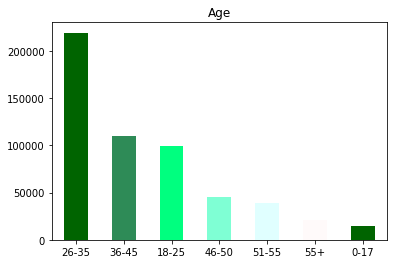

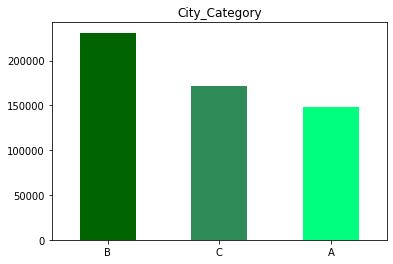

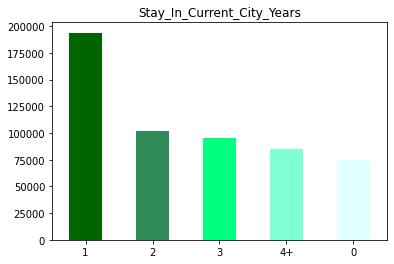

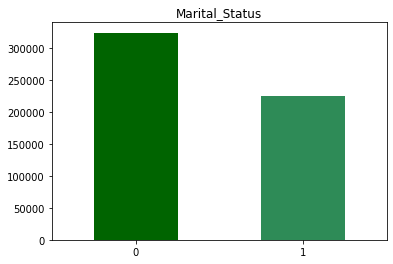

In [71]:
for i in graphcols:
    traindt[i].value_counts().plot.bar(color=['darkgreen','seagreen', 'springgreen', 'aquamarine', 'lightcyan', 'snow'])
    plt.xticks(rotation=0)
    plt.title('{0}'.format(i))
    plt.show()

1.   it is seen that customers of age 26-35 make more purchases, customers of age 0-17 make minimal purchases
2.   More orders are made by male customers
3.   More orders are made people living in 'B' City Category
4.   More orders are made people living in city for 1 years (Stay_In_Current_City_Years)
5.   More orders are made by people with Marital Status as 0

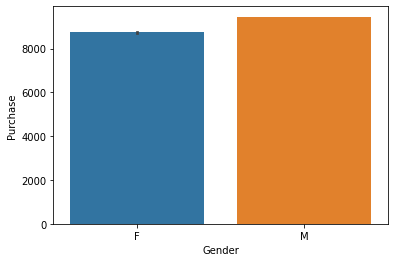

In [72]:
# bar plot with default statistic=mean
sns.barplot(x='Gender', y='Purchase', data=traindt)
plt.show()

# though majorly male customers shop a lot, the average purchase amount is quite close for both the genders

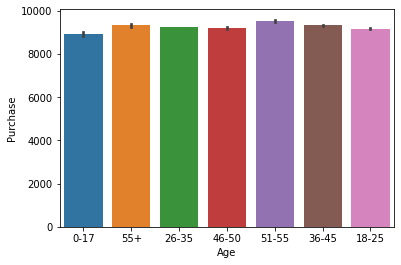

In [73]:
# bar plot with default statistic=mean
sns.barplot(y='Purchase',x='Age',data=traindt)
plt.show()

# Average purchase amount is similar for all age groups

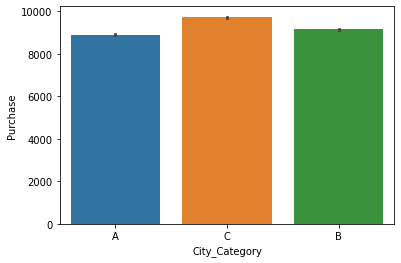

In [74]:
# bar plot with default statistic=mean
sns.barplot(x='City_Category', y='Purchase', data=traindt)
plt.show()

# Average purchase amount is higher for C

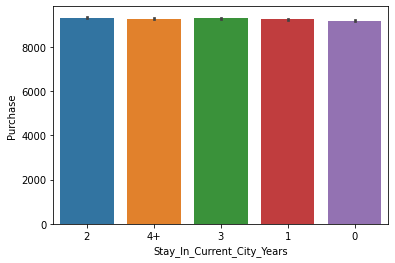

In [75]:
# bar plot with default statistic=mean
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=traindt)
plt.show()

# Average purchase amount nearly same for all groups of Stay_In_Current_City_Years

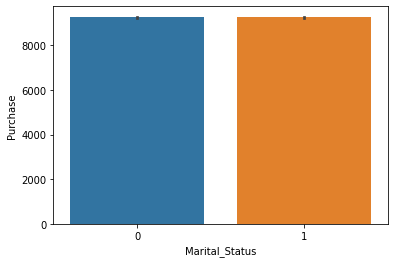

In [76]:
# bar plot with default statistic=mean
sns.barplot(x='Marital_Status', y='Purchase', data=traindt)
plt.show()

# Average purchase amount is nearly same for both married and unmarried

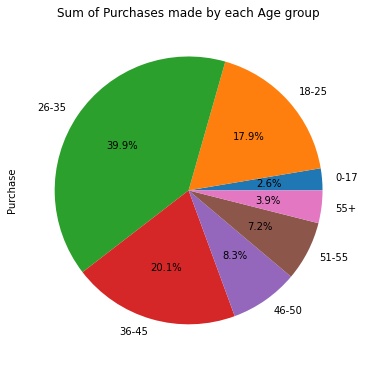

In [77]:
plt.figure(figsize=(6,8))
traindt.Purchase.groupby(traindt.Age).sum().plot(kind='pie',autopct='%1.1f%%',)
plt.title("Sum of Purchases made by each Age group")
plt.show()
# 39.9% of the total purchase amount is from the orders made by customers of Age 26-35

In [78]:
# Top 10 products for which more no of orders are made
traindt.groupby(traindt.Product_ID)['Purchase'].count().sort_values(ascending=False)[:10]

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: Purchase, dtype: int64

In [79]:
traindt[traindt.User_ID==traindt.groupby(traindt.User_ID)['Purchase'].sum().idxmax()]
# Fetching the records of the user who has made maximum Puchases during the sale

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27930,1004277,P00034742,M,36-45,16,A,0,0,5,14.0,17.0,8763
27931,1004277,P00028542,M,36-45,16,A,0,0,6,8.0,14.0,20400
27932,1004277,P00116842,M,36-45,16,A,0,0,2,5.0,8.0,16070
27933,1004277,P00063342,M,36-45,16,A,0,0,1,2.0,9.0,15193
27934,1004277,P00359042,M,36-45,16,A,0,0,2,8.0,14.0,12750
...,...,...,...,...,...,...,...,...,...,...,...,...
534407,1004277,P00354242,M,36-45,16,A,0,0,5,NaN,NaN,6992
534408,1004277,P00370142,M,36-45,16,A,0,0,16,NaN,NaN,16801
534409,1004277,P00161042,M,36-45,16,A,0,0,14,16.0,NaN,11491
534410,1004277,P00199942,M,36-45,16,A,0,0,16,NaN,NaN,12691


In [80]:
# To Check the Null average of purchase between male and female
print(traindt.Purchase.groupby(traindt.Gender).mean())

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [81]:
print(traindt.Purchase.groupby(traindt.Gender).var())

Gender
F    2.272651e+07
M    2.593036e+07
Name: Purchase, dtype: float64


In [82]:
# Null - There is no significant difference in purchases of male and female
# Alt - There is a significant difference in purchases of male and female

In [83]:
# split the data
male=traindt[traindt.Gender=='M']
female=male=traindt[traindt.Gender=='F']

In [84]:
from scipy.stats import ttest_ind

In [85]:
ttest_ind(male.Purchase,female.Purchase,equal_var=False)
# Since pvalue=1.0>0.05, we fail to reject null hypothesis

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [86]:
# checking for missing values
round(traindt.isnull().sum().sort_values(ascending=False)/len(traindt)*100,2)
# Missing values are treated in the below data preprocessing function

Product_Category_3            69.67
Product_Category_2            31.57
Purchase                       0.00
Product_Category_1             0.00
Marital_Status                 0.00
Stay_In_Current_City_Years     0.00
City_Category                  0.00
Occupation                     0.00
Age                            0.00
Gender                         0.00
Product_ID                     0.00
User_ID                        0.00
dtype: float64

In [87]:
# Creating Min_Max_Scaler function
def mini_max_scaler(data):
  min_val=data.min()
  max_val=data.max()
  data=(data-min_val)/(max_val-min_val)
  return data

In [88]:
# creating a data preprocessing function
def data_preprocessing(train,test):
  
  # Adding reference variable to identify train and test data
  train['Split']='train'
  test['Split']='test'

  # Concatenating train data (without purchase) and test data row wise
  concatdt=pd.concat([train.drop('Purchase',axis=1),test],axis=0)

  # Treating Missing values

  # replacing missing values in Product_Category_2 and Product_Category_3 with 0
  concatdt.Product_Category_2.fillna(0,inplace=True)
  concatdt.Product_Category_3.fillna(0,inplace=True)

  # Split columns in to category columns and numeric columns
  catcols=concatdt[['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']]
  numcols=concatdt.drop(['Gender', 'Age', 'City_Category',
                           'Stay_In_Current_City_Years', 'Marital_Status'],axis=1)

  # Encoding Categorical variables into dummy or indicator variables
  catcolsdummy=pd.get_dummies(catcols)

  # combining encoded catcolsdummy and numcols
  combinedf=pd.concat([catcolsdummy,numcols],axis=1)

  # Feature Engineering

  # Creating User_ID_Count column with respect to training data (no of orders made by each user)
  UID_value_counts=train.User_ID.value_counts().to_dict()
  combinedf['User_ID_Count'] = combinedf['User_ID'].apply(lambda x:UID_value_counts.get(x,0))

  # Creating Product_ID_Count column with respect to training data (no of orders for each product_ID)
  ProdID_value_counts=train.Product_ID.value_counts().to_dict()
  combinedf['Product_ID_Count'] = combinedf['Product_ID'].apply(lambda x:ProdID_value_counts.get(x,0))

  # Creating Product_Category_1_Count column with respect to training data (no of orders of each type in product_Category_1)
  pc1_value_counts=train.Product_Category_1.value_counts().to_dict()
  combinedf['Product_Category_1_Count'] = combinedf['Product_Category_1'].apply(lambda x:pc1_value_counts.get(x,0))

  # Creating Product_Category_2_Count column with respect to training data (no of orders of each type in product_Category_2)
  pc2_value_counts=train.Product_Category_2.value_counts().to_dict()
  combinedf['Product_Category_2_Count'] = combinedf['Product_Category_2'].apply(lambda x:pc2_value_counts.get(x,0))  

  # Creating Product_Category_3_Count column with respect to training data (no of orders of each type in product_Category_3)
  pc3_value_counts=train.Product_Category_3.value_counts().to_dict()
  combinedf['Product_Category_3_Count'] = combinedf['Product_Category_3'].apply(lambda x:pc3_value_counts.get(x,0))

  # Creating User_ID_MaxPurchase column with respect to training data (Max purchase made by each user)
  UID_Max_Purchase=train.Purchase.groupby(train.User_ID).max().to_dict()
  combinedf['User_ID_MaxPurchase'] = combinedf['User_ID'].apply(lambda x:UID_Max_Purchase.get(x,0))

  # Creating User_ID_MinPurchase column with respect to training data (Min purchase made by each user)
  UID_Min_Purchase=train.Purchase.groupby(train.User_ID).min().to_dict()
  combinedf['User_ID_MinPurchase'] = combinedf['User_ID'].apply(lambda x:UID_Min_Purchase.get(x,0))

  # Creating User_ID_AvgPurchase column with respect to training data (Avg purchase made by each user)
  UID_Avg_Purchase=train.Purchase.groupby(train.User_ID).mean().to_dict()
  combinedf['User_ID_AvgPurchase'] = combinedf['User_ID'].apply(lambda x:UID_Avg_Purchase.get(x,0))

  # Creating User_ID_PurchaseSum column with respect to training data (total purchase made by each user)
  UID_PurchaseSum=train.Purchase.groupby(train.User_ID).sum().to_dict()
  combinedf['User_ID_PurchaseSum'] = combinedf['User_ID'].apply(lambda x:UID_PurchaseSum.get(x,0))

  # Creating Product_ID_MaxPurchase column with respect to training data (Max purchase of each product_ID)
  ProdID_Max_Purchase=train.Purchase.groupby(train.Product_ID).max().to_dict()
  combinedf['Product_ID_MaxPurchase'] = combinedf['Product_ID'].apply(lambda x:ProdID_Max_Purchase.get(x,0))

  # Creating Product_ID_MinPurchase column with respect to training data (Min purchase of each product_ID)
  ProdID_Min_Purchase=train.Purchase.groupby(train.Product_ID).min().to_dict()
  combinedf['Product_ID_MinPurchase'] = combinedf['Product_ID'].apply(lambda x:ProdID_Min_Purchase.get(x,0))

  # Creating Product_ID_AvgPurchase column with respect to training data (Avg purchase of each product_ID)
  ProdID_Avg_Purchase=train.Purchase.groupby(train.Product_ID).mean().to_dict()
  combinedf['Product_ID_AvgPurchase'] = combinedf['Product_ID'].apply(lambda x:ProdID_Avg_Purchase.get(x,0))

  # Creating Product_ID_PurchaseSum column with respect to training data (total purchase made for each product)
  ProdID_PurchaseSum=train.Purchase.groupby(train.Product_ID).sum().to_dict()
  combinedf['Product_ID_PurchaseSum'] = combinedf['Product_ID'].apply(lambda x:ProdID_PurchaseSum.get(x,0))

  # Dropping User_ID and Product_ID columns
  # combinedf.drop(['User_ID','Product_ID'],axis=1,inplace=True)
  combinedf.Product_ID=combinedf.Product_ID.str.slice(1,).astype('int64')

  # Select the scaling columns
  scale_cols=['User_ID','Product_ID','User_ID_Count','Product_ID_Count','Product_Category_1_Count','Product_Category_2_Count',
            'Product_Category_3_Count','User_ID_MaxPurchase','User_ID_MinPurchase','User_ID_AvgPurchase','User_ID_PurchaseSum',
            'Product_ID_MaxPurchase','Product_ID_MinPurchase','Product_ID_AvgPurchase','Product_ID_PurchaseSum']

  # Scaling the columns
  for col in scale_cols:
    combinedf[col]=mini_max_scaler(combinedf[col])

  # Splitting the train and test data
  traindf=combinedf[combinedf.Split=='train']
  testdf=combinedf[combinedf.Split=='test']

  # Dropping the Split column from train and test data
  traindf.drop('Split',axis=1,inplace=True)
  testdf.drop('Split',axis=1,inplace=True)

  # Adding the Purchase column to the traindf
  traindf['Purchase']=train.Purchase

  # returning the processed train and test data
  return traindf,testdf

In [89]:
print(traindt.shape)
print(testdt.shape)

(550068, 12)
(233599, 11)


In [93]:
Clean_train,Clean_test=data_preprocessing(traindt,testdt)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [94]:
print(Clean_train.shape)
print(Clean_test.shape)

(550068, 38)
(233599, 37)


In [95]:
Clean_train.head()

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,User_ID,Product_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,User_ID_Count,Product_ID_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,User_ID_MaxPurchase,User_ID_MinPurchase,User_ID_AvgPurchase,User_ID_PurchaseSum,Product_ID_MaxPurchase,Product_ID_MinPurchase,Product_ID_AvgPurchase,Product_ID_PurchaseSum,Purchase
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.000000,0.183589,10,3,0.0,0.0,0.028431,0.120745,0.131561,0.000000,0.000000,0.754568,0.052070,0.444474,0.027398,0.572430,0.130296,0.558458,0.096255,8370
1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.000000,0.662947,10,1,6.0,14.0,0.028431,0.309043,0.929878,0.256928,0.564653,0.754568,0.052070,0.444474,0.027398,0.822211,0.190917,0.767014,0.338367,15200
2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.000000,0.233683,10,12,0.0,0.0,0.028431,0.054255,0.023498,0.000000,0.000000,0.754568,0.052070,0.444474,0.027398,0.074120,0.016877,0.058236,0.004510,1422
3,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.000000,0.227288,10,12,14.0,0.0,0.028431,0.181383,0.023498,0.859880,0.000000,0.754568,0.052070,0.444474,0.027398,0.074204,0.017960,0.068456,0.017725,1057
4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0.000166,0.760204,16,8,0.0,0.0,0.069608,0.107979,0.754137,0.000000,0.000000,0.828994,0.009286,0.504754,0.072810,0.420391,0.192885,0.361902,0.055782,7969


In [96]:
# Dropping Gender_F, Age_55+, City_Category_C and Stay_In_Current_City_Years_4+ columns to avoid dummy variable trap
Clean_train.drop(['Gender_F', 'Age_55+', 'City_Category_C', 'Stay_In_Current_City_Years_4+'],axis=1,inplace=True)
Clean_test.drop(['Gender_F', 'Age_55+', 'City_Category_C', 'Stay_In_Current_City_Years_4+'],axis=1,inplace=True)

In [97]:
print(Clean_train.shape)
print(Clean_test.shape)

(550068, 34)
(233599, 33)


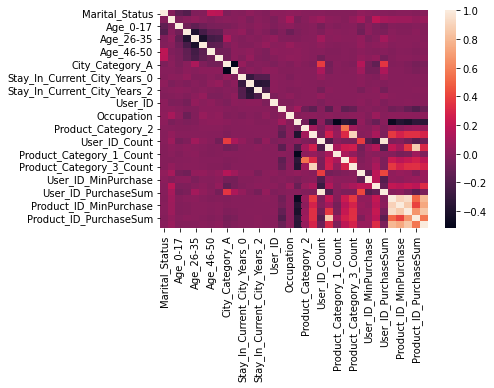

In [119]:
sns.heatmap(Clean_train.corr())

In [141]:
# removing outliers

q1 = Clean_train['Purchase'].quantile(0.25)
q3 = Clean_train['Purchase'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
Clean_train = Clean_train[(Clean_train['Purchase'] > fence_low) & (Clean_train['Purchase'] < fence_high)]

In [142]:
X=Clean_train.drop('Purchase',axis=1)
y=Clean_train.Purchase

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as rmse

In [99]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.5,test_size=0.2,random_state=27)
# Reducing the train size as the data set is large

In [100]:
score=pd.DataFrame(columns=['Model','Test Accuracy','RMSE'])

In [101]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lrmodel=lr.fit(x_train,y_train)
print('Linear Regression train dataset score:',lrmodel.score(x_train,y_train))
lr_train_predict=lrmodel.predict(x_train)
print('Linear Regression train dataset RMSE:',rmse(y_train,lr_train_predict,squared=False))
print('Linear Regression test dataset score:',lrmodel.score(x_test,y_test))
lr_test_predict=lrmodel.predict(x_test)
lr_rmse=rmse(y_test,lr_test_predict,squared=False)
print('Linear Regression test dataset RMSE:',lr_rmse)
score.loc[0]=('Linear Regression',lrmodel.score(x_test,y_test),lr_rmse)

Linear Regression train dataset score: 0.7427489831206646
Linear Regression train dataset RMSE: 2545.4677334210764
Linear Regression test dataset score: 0.7464054424258615
Linear Regression test dataset RMSE: 2534.569555654942


In [102]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(max_depth=12)
treemodel=tree.fit(x_train,y_train)
print('Decision tree train dataset score:',treemodel.score(x_train,y_train))
tree_train_predict=treemodel.predict(x_train)
print('Decision tree train dataset RMSE:',rmse(y_train,tree_train_predict,squared=False))
print('Decision tree test dataset score:',treemodel.score(x_test,y_test))
tree_test_predict=treemodel.predict(x_test)
tree_rmse=rmse(y_test,tree_test_predict,squared=False)
print('Decision tree test dataset RMSE:',tree_rmse)
score.loc[1]=('Decision tree',treemodel.score(x_test,y_test),tree_rmse)

Decision tree train dataset score: 0.7755907279509432
Decision tree train dataset RMSE: 2377.4393392444767
Decision tree test dataset score: 0.7352475247589806
Decision tree test dataset RMSE: 2589.7286662512606


In [103]:
#pd.DataFrame(tree_test_predict).to_csv('/content/drive/MyDrive/Colab Notebooks/Decision_tree.csv')

In [104]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=13)
rfmodel=rf.fit(x_train,y_train)
print('RandomForest train dataset score:',rfmodel.score(x_train,y_train))
rf_train_predict=rfmodel.predict(x_train)
print('RandomForest train dataset RMSE:',rmse(y_train,rf_train_predict,squared=False))
print('RandomForest test dataset score:',rfmodel.score(x_test,y_test))
rf_test_predict=rfmodel.predict(x_test)
rf_rmse=rmse(y_test,rf_test_predict,squared=False)
print('RandomForest test dataset RMSE:',rf_rmse)
score.loc[2]=('RandomForest',rfmodel.score(x_test,y_test),rf_rmse)

RandomForest train dataset score: 0.8024625049342529
RandomForest train dataset RMSE: 2230.559524691794
RandomForest test dataset score: 0.7591075042392269
RandomForest test dataset RMSE: 2470.278310003649


In [105]:
imp=pd.DataFrame(rf.feature_importances_,index=rf.feature_names_in_,columns=['importance'])

In [106]:
len(imp)

33

In [112]:
imp.sort_values('importance',ascending=False)[:15]
# top 15 important columns based on feature importance values

,importance
Product_ID_AvgPurchase,0.901652
User_ID_AvgPurchase,0.037170
User_ID_MaxPurchase,0.010156
User_ID_PurchaseSum,0.005999
User_ID,0.005668
User_ID_MinPurchase,0.005166
Product_ID_MaxPurchase,0.004944
User_ID_Count,0.004279
Product_ID,0.003465
Product_ID_MinPurchase,0.003163


In [111]:
from sklearn.ensemble import GradientBoostingRegressor as GBM

gbm=GBM()
gbmmodel=gbm.fit(x_train,y_train)
print('GBM train dataset score:',gbmmodel.score(x_train,y_train))
gbm_train_predict=gbmmodel.predict(x_train)
print('GBM train dataset RMSE:',rmse(y_train,gbm_train_predict,squared=False))
print('GBM test dataset score:',gbmmodel.score(x_test,y_test))
gbm_test_predict=gbmmodel.predict(x_test)
gbm_rmse=rmse(y_test,gbm_test_predict,squared=False)
print('GBM test dataset RMSE:',gbm_rmse)
score.loc[3]=('GBM',gbmmodel.score(x_test,y_test),gbm_rmse)

GBM train dataset score: 0.7517023862011016
GBM train dataset RMSE: 2500.7790309484462
GBM test dataset score: 0.7536653051464701
GBM test dataset RMSE: 2498.0265020848856


In [ ]:
# gbm_eval_predict=gbmmodel.predict(Clean_test)

In [ ]:
#pd.DataFrame(gbm_eval_predict).to_csv('/content/drive/MyDrive/Colab Notebooks/gbm.csv')

In [113]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()
adamodel=ada.fit(x_train,y_train)
print('ADBR train dataset score:',adamodel.score(x_train,y_train))
ada_train_predict=adamodel.predict(x_train)
print('ADBR train dataset RMSE:',rmse(y_train,ada_train_predict,squared=False))
print('ADBR test dataset score:',adamodel.score(x_test,y_test))
ada_test_predict=adamodel.predict(x_test)
ada_rmse=rmse(y_test,ada_test_predict,squared=False)
print('ADBR test dataset RMSE:',ada_rmse)
score.loc[4]=('AdaBoost Regressor',gbmmodel.score(x_test,y_test),ada_rmse)

ADBR train dataset score: 0.7088593778671015
ADBR train dataset RMSE: 2707.948801723054
ADBR test dataset score: 0.7107296212553014
ADBR test dataset RMSE: 2706.98738350873


In [2]:
#objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 0.05,max_depth = 700, alpha = 14, n_estimators = 120)


In [114]:
import  xgboost

xgb = xgboost.XGBRegressor()
xgbmodel=xgb.fit(x_train,y_train)
print('XGB train dataset score:',xgbmodel.score(x_train,y_train))
xgb_train_predict=xgbmodel.predict(x_train)
print('XGB train dataset RMSE:',rmse(y_train,xgb_train_predict,squared=False))
print('XGB test dataset score:',xgbmodel.score(x_test,y_test))
xgb_test_predict=xgbmodel.predict(x_test)
xgb_rmse=rmse(y_test,xgb_test_predict,squared=False)
print('XGB test dataset RMSE:',xgb_rmse)
score.loc[5]=('XGB',xgbmodel.score(x_test,y_test),xgb_rmse)

[10:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB train dataset score: 0.751898079244494
XGB train dataset RMSE: 2499.7933559034586
XGB test dataset score: 0.753932369168278
XGB test dataset RMSE: 2496.672015821898


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsRegressor

# parameters={'n_neighbors':range(1,5),'weights':['uniform','distance']}
# knn=KNeighborsRegressor()
# gridsearch=GridSearchCV(knn,parameters)
# gridsearchmodel=gridsearch.fit(x_train,y_train)
# gridsearchmodel.best_params_

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knnmodel=knn.fit(x_train,y_train)
print('KNN train dataset score:',knnmodel.score(x_train,y_train))
knn_train_predict=knnmodel.predict(x_train)
print('KNN train dataset RMSE:',rmse(y_train,knn_train_predict,squared=False)) 
print('KNN test dataset score:',knnmodel.score(x_test,y_test))
knn_test_predict=knnmodel.predict(x_test)
knn_rmse=rmse(y_test,knn_test_predict,squared=False)
print('KNN test dataset RMSE:',knn_rmse)
score.loc[6]=('KNN',knnmodel.score(x_test,y_test),knn_rmse)

KNN train dataset score: 0.8096151833112759
KNN train dataset RMSE: 2189.803780793368
KNN test dataset score: 0.6115532599231692
KNN test dataset RMSE: 3136.895058659226


In [117]:
from sklearn.neural_network import MLPRegressor

nn=MLPRegressor()
nnmodel=nn.fit(x_train,y_train)
print('Neural Network train dataset score:',nnmodel.score(x_train,y_train))
nn_train_predict=nnmodel.predict(x_train)
print('Neural Network train dataset RMSE:',rmse(y_train,nn_train_predict,squared=False))
print('Neural Network test dataset score:',nnmodel.score(x_test,y_test))
nn_test_predict=nnmodel.predict(x_test)
nn_rmse=rmse(y_test,nn_test_predict,squared=False)
print('Neural Network test dataset RMSE:',nn_rmse)
score.loc[7]=('Neural Network',nnmodel.score(x_test,y_test),nn_rmse)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Neural Network train dataset score: 0.7459004015972084
Neural Network train dataset RMSE: 2529.8282358923625
Neural Network test dataset score: 0.7492163547736097
Neural Network test dataset RMSE: 2520.4834777442834


In [139]:
## Model performances
score
# Random Forest has performed best compared to other models 

,Model,Test Accuracy,RMSE
0,Linear Regression,0.746405,2534.569556
1,Decision tree,0.735248,2589.728666
2,RandomForest,0.759108,2470.278310
3,GBM,0.753665,2498.026502
4,AdaBoost Regressor,0.753665,2706.987384
5,XGB,0.753932,2496.672016
6,KNN,0.611553,3136.895059
7,Neural Network,0.749216,2520.483478


In [ ]:
# Hyper Parameter tuning for Random Forest Algoritm

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [134]:
# A parameter grid for XGBoost
params = {
        'alpha': [0.5, 1, 1.5, 2,3,5,7,9,10,12,14],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [100,200,300,400,500,600,700,800,900,1000,1100,1200],
        'n_estimators':[30,50,70,80,90,100,120,140,160,180],
        'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6]
        }